In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [169]:
import warnings
warnings.filterwarnings('ignore')

In [170]:
df=pd.read_csv('/content/drive/MyDrive/80_Cereals/cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


**Data Exploration**

In [171]:
df.shape

(77, 16)

In [172]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [173]:
df.tail(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
67,Special K,K,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.0,1.00,59.363993
69,Total Corn Flakes,G,C,110,2,1,200,0.0,21.0,3,35,100,3,1.0,1.00,38.839746
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785
71,Total Whole Grain,G,C,100,3,1,200,3.0,16.0,3,110,100,3,1.0,1.00,46.658844
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [175]:
df.dtypes

,0
name,object
mfr,object
type,object
calories,int64
protein,int64
fat,int64
sodium,int64
fiber,float64
carbo,float64
sugars,int64


In [176]:
cols=['name','mfr','type','calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']
for col in cols:
  print(f'{"*"*20} {col} {"*"*20}')
  print(df[col].value_counts())
  print()

******************** name ********************
name
100% Bran                    1
Nutri-Grain Almond-Raisin    1
Quaker Oat Squares           1
Puffed Wheat                 1
Puffed Rice                  1
                            ..
Frosted Flakes               1
Froot Loops                  1
Double Chex                  1
Crispy Wheat & Raisins       1
Wheaties Honey Gold          1
Name: count, Length: 77, dtype: int64

******************** mfr ********************
mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

******************** type ********************
type
C    74
H     3
Name: count, dtype: int64

******************** calories ********************
calories
110    29
100    17
120    10
90      7
50      3
140     3
70      2
130     2
150     2
160     1
80      1
Name: count, dtype: int64

******************** protein ********************
protein
3    28
2    25
1    13
4     8
6     2
5     1
Name: count, dtype: int64

**********

**Data Cleaning**

In [177]:
df.isna().sum()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


In [178]:
df.duplicated().any()

False

In [179]:
df.rename(columns={'mfr':'manufacturer', 'calories': 'calories (cal/serv)','protein': 'protein (g)', 'fat': 'fat (g)','sodium': 'sodium (mg)','fiber':'fiber (g)','carbo':'carbohydrates (g)','sugars':'sugars (g)','potass':'potassium (mg)','vitamins': 'vitamins (%)', 'weight':'weight (oz/serv)','cups': 'cups(cups/serv)'}, inplace = True)

In [180]:
df['manufacturer'] = df['manufacturer'].replace({'A':'American Home Food Products','G':'General Mills','K' : 'Kelloggs','N' : 'Nabisco','P' : 'Post','Q' : 'Quaker Oats', 'R' : 'Ralston Purina'})

In [181]:
df['type'] = df['type'].replace({'C':'Cold','H':'Hot'})

In [182]:
df.drop('shelf',axis=1,inplace=True)

In [183]:
df.head(10)

,name,manufacturer,type,calories (cal/serv),protein (g),fat (g),sodium (mg),fiber (g),carbohydrates (g),sugars (g),potassium (mg),vitamins (%),weight (oz/serv),cups(cups/serv),rating
0,100% Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6,280,25,1.00,0.33,68.402973
1,100% Natural Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8,135,0,1.00,1.00,33.983679
2,All-Bran,Kelloggs,Cold,70,4,1,260,9.0,7.0,5,320,25,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,Cold,50,4,0,140,14.0,8.0,0,330,25,1.00,0.50,93.704912
4,Almond Delight,Ralston Purina,Cold,110,2,2,200,1.0,14.0,8,-1,25,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1.00,0.75,29.509541
6,Apple Jacks,Kelloggs,Cold,110,2,0,125,1.0,11.0,14,30,25,1.00,1.00,33.174094
7,Basic 4,General Mills,Cold,130,3,2,210,2.0,18.0,8,100,25,1.33,0.75,37.038562
8,Bran Chex,Ralston Purina,Cold,90,2,1,200,4.0,15.0,6,125,25,1.00,0.67,49.120253
9,Bran Flakes,Post,Cold,90,3,0,210,5.0,13.0,5,190,25,1.00,0.67,53.313813


In [188]:
cereal_names = df['name'].unique()
for name in cereal_names:
    print(name)

100% Bran
100% Natural Bran
All-Bran
All-Bran with Extra Fiber
Almond Delight
Apple Cinnamon Cheerios
Apple Jacks
Basic 4
Bran Chex
Bran Flakes
Cap'n'Crunch
Cheerios
Cinnamon Toast Crunch
Clusters
Cocoa Puffs
Corn Chex
Corn Flakes
Corn Pops
Count Chocula
Cracklin' Oat Bran
Cream of Wheat (Quick)
Crispix
Crispy Wheat & Raisins
Double Chex
Froot Loops
Frosted Flakes
Frosted Mini-Wheats
Fruit & Fibre Dates; Walnuts; and Oats
Fruitful Bran
Fruity Pebbles
Golden Crisp
Golden Grahams
Grape Nuts Flakes
Grape-Nuts
Great Grains Pecan
Honey Graham Ohs
Honey Nut Cheerios
Honey-comb
Just Right Crunchy  Nuggets
Just Right Fruit & Nut
Kix
Life
Lucky Charms
Maypo
Muesli Raisins; Dates; & Almonds
Muesli Raisins; Peaches; & Pecans
Mueslix Crispy Blend
Multi-Grain Cheerios
Nut&Honey Crunch
Nutri-Grain Almond-Raisin
Nutri-grain Wheat
Oatmeal Raisin Crisp
Post Nat. Raisin Bran
Product 19
Puffed Rice
Puffed Wheat
Quaker Oat Squares
Quaker Oatmeal
Raisin Bran
Raisin Nut Bran
Raisin Squares
Rice Chex
Rice Kr

**Data Visualization**

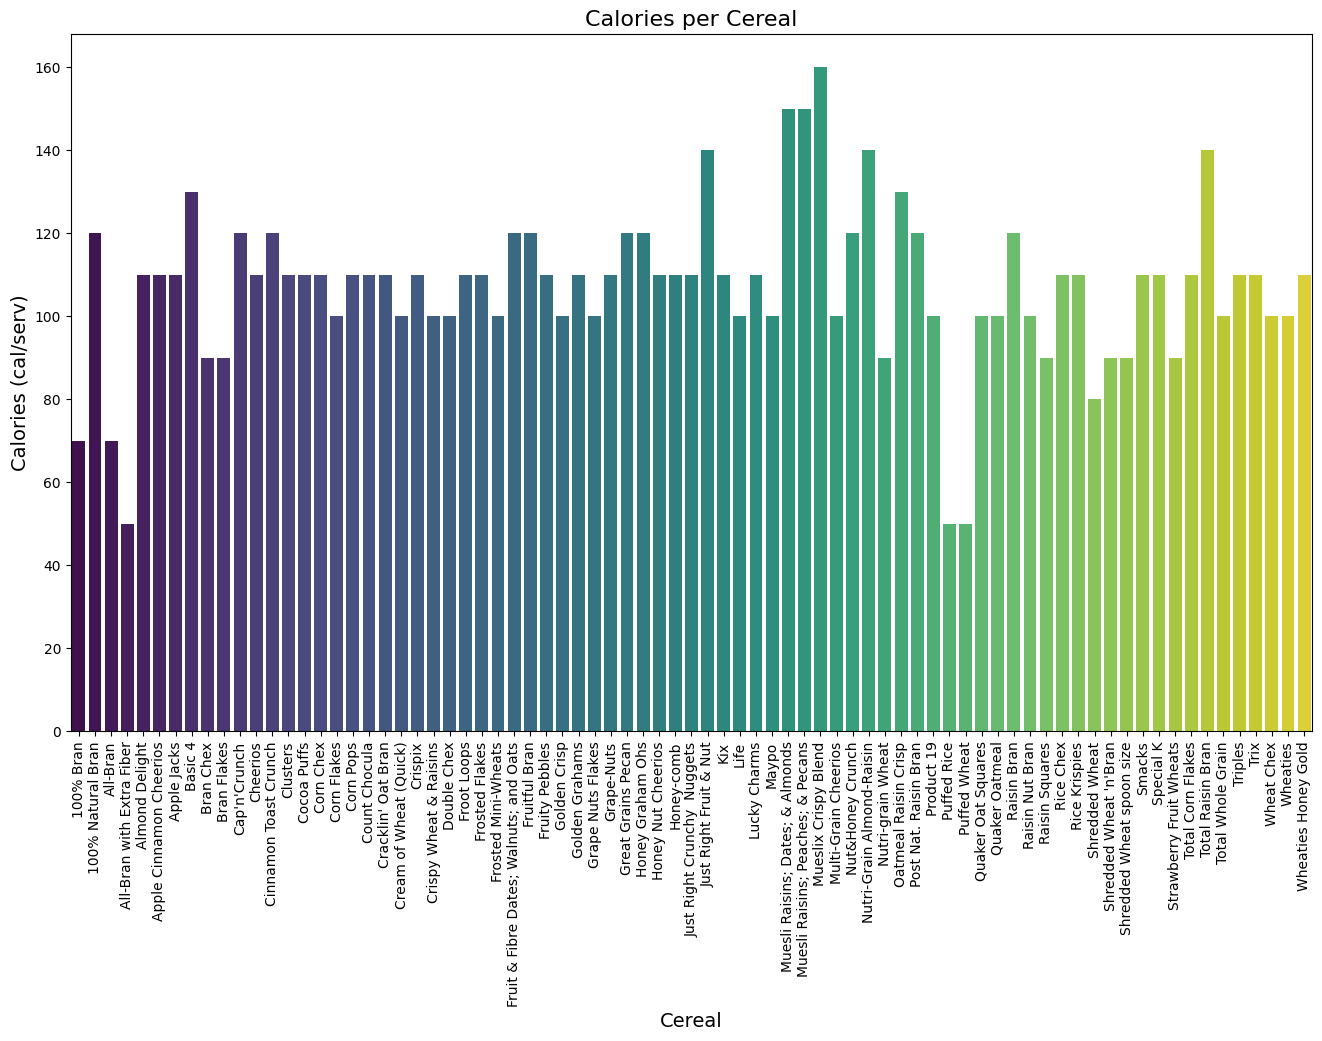

In [189]:
plt.figure(figsize=(14, 8))
sns.barplot(x='name', y='calories (cal/serv)', data=df, palette='viridis')
plt.title('Calories per Cereal', fontsize=16)
plt.xlabel('Cereal', fontsize=14)
plt.ylabel('Calories (cal/serv)', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Mueslix Crispy Blend is the item that has the highest calorie followed by Muesli Raisins; Dates; & Almonds and Muesli Raisins; Peaches; & Pecans. Puffed Rice, Puffed Wheat and All-Bran with Extra Fiber are the items with the lowest calories.

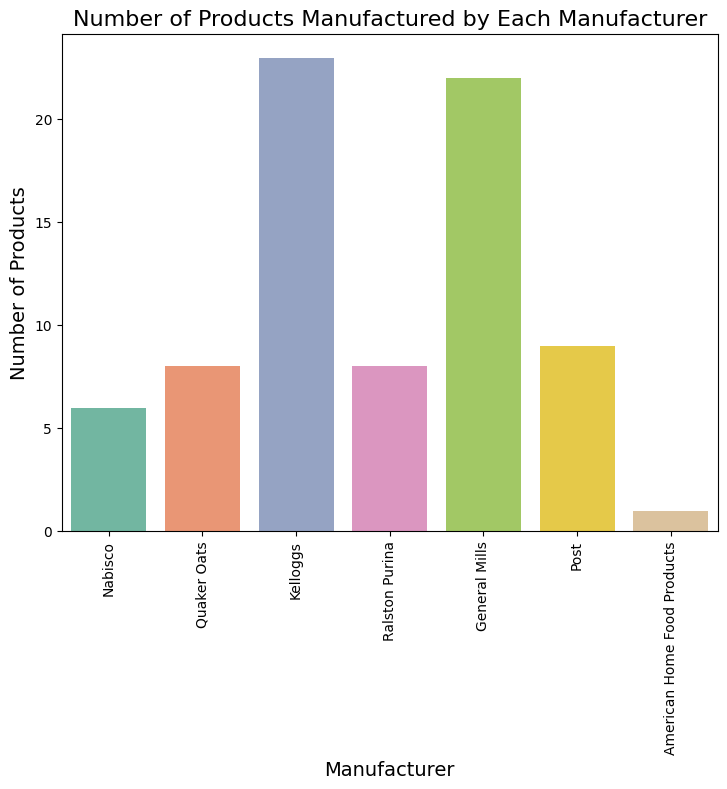

In [190]:
plt.figure(figsize=(8, 6))
sns.countplot(x='manufacturer', data=df, palette='Set2')
plt.title('Number of Products Manufactured by Each Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

   Kelloggs and General Mills are the manufacturers with the highest number of products. American Home Food Products is the manufacturer with the least number of products.

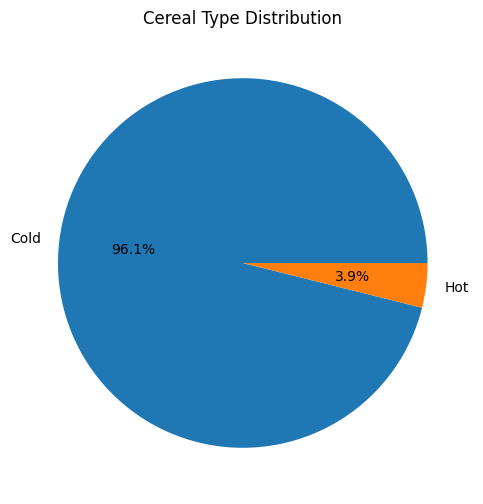

In [191]:
plt.figure(figsize=(6,6))
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%')
plt.title('Cereal Type Distribution')
plt.show()

Cold cereals are overwhelmingly dominant in the market, making up 96.1% of the total cereal distribution. Hot cereals constitute a much smaller portion of the market, accounting for only 3.9%.

In [192]:
fig = px.bar(df, x="name", y="protein (g)", color="name", title="Protein (g) per Cereal")
fig.update_layout(
    xaxis=dict(
        categoryorder='total descending',
        tickmode='array',
        tickvals=df['name'],
        ticktext=df['name']
    )
)
fig.show()

Special K and Cheerios has the highest amount of protein while Trix, Rice Chex, etc has the lowest protein.

In [196]:
fig = px.bar(df, x="name", y="fat (g)", color="name", title="Fat(g) per Cereal")
fig.update_layout(
    xaxis=dict(
        categoryorder='total descending',
        tickmode='array',
        tickvals=df['name'],
        ticktext=df['name']
    )
)
fig.show()

100% Natural Bran has the highest amount of fat among all other cereals.

In [197]:
fig = px.bar(df, x="name", y="fiber (g)", color="name", title="Fiber(g) per Cereal")
fig.update_layout(
    xaxis=dict(
        categoryorder='total descending',
        tickmode='array',
        tickvals=df['name'],
        ticktext=df['name']
    )
)
fig.show()

All-Bran with Extra Fiber is the cereal which has the higheast amount of fiber in it while Trix, Triples, Total Corn Flakes etc has no fiber in them.

In [198]:
fig = px.bar(df, x="name", y="vitamins (%)", color="name", title="Vitamins(%) per Cereal")
fig.update_layout(
    xaxis=dict(
        categoryorder='total descending',
        tickmode='array',
        tickvals=df['name'],
        ticktext=df['name']
    )
)
fig.show()

Total Whole Grain, Total raisin Bran, Total Corn Flakes etc are the vitamin rich items while 100% Natural Bran, Cream of Wheat(Quick) etc have no vitamin in them.

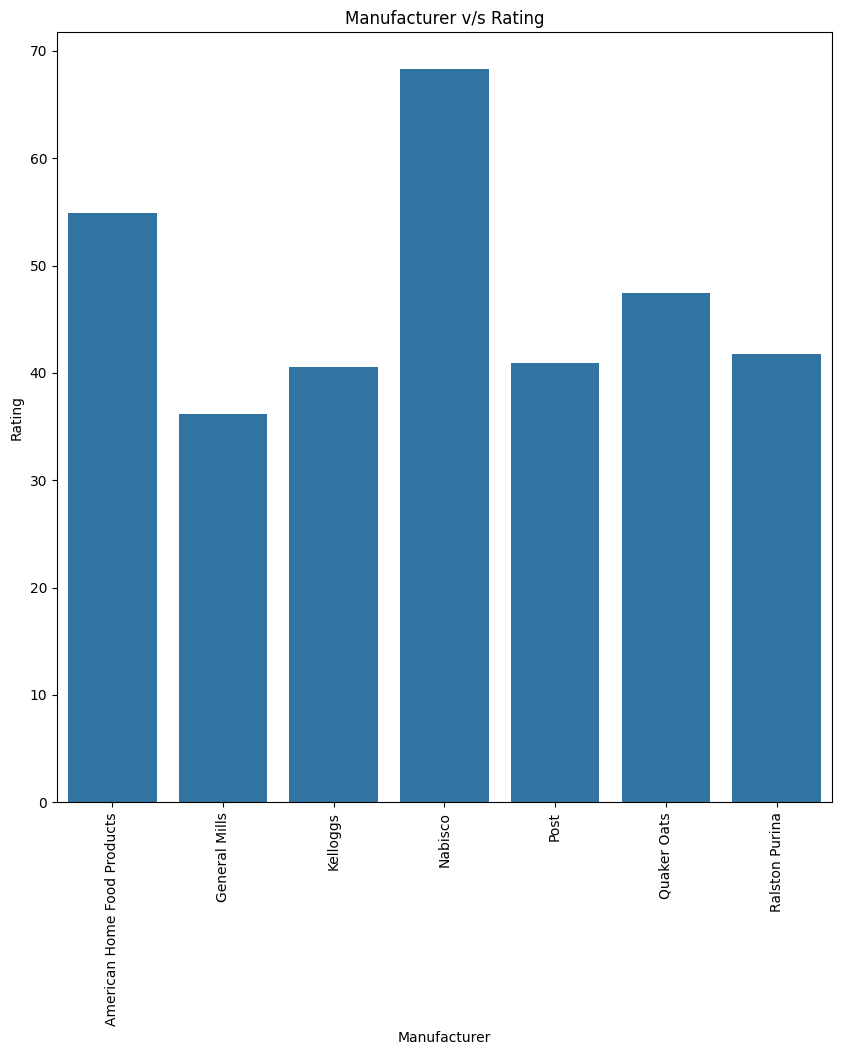

In [204]:
df_grouped = df.groupby('manufacturer')['rating'].median().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(data=df_grouped, x='manufacturer', y='rating')
plt.title('Manufacturer v/s Rating', fontsize=12)
plt.xlabel('Manufacturer', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Nabisco is the manufacturer with the highest rating among all other manufacturers while General Mills has the least.

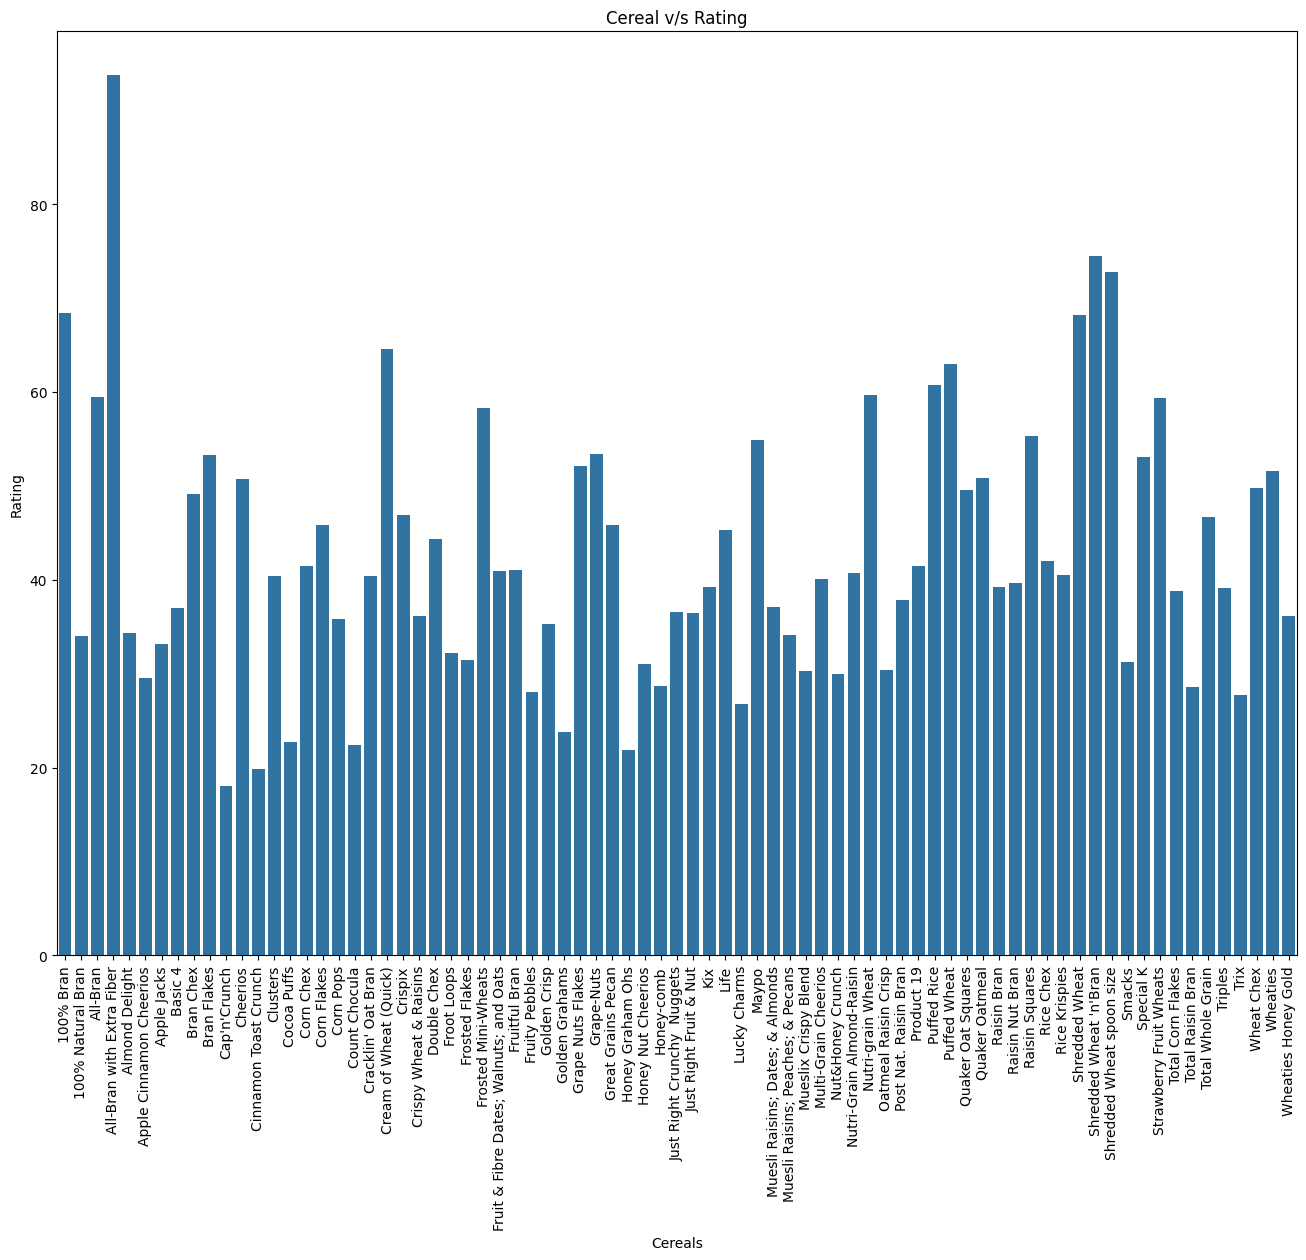

In [208]:
df_grouped = df.groupby('name')['rating'].median().reset_index()
plt.figure(figsize=(16,12))
sns.barplot(data=df_grouped, x='name', y='rating')
plt.title('Cereal v/s Rating', fontsize=12)
plt.xlabel('Cereals', fontsize=10)
plt.ylabel('Rating', fontsize=10)
plt.xticks(rotation=90)
plt.show()

All-Bran with Extra Fiber has the highest rating while Cap'n'Crunch has the least rating.